In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv("/content/drive/MyDrive/Datasets/tinder_google_play_reviews.csv")
print(data.head())

                               reviewId      userName  \
0  5eede85c-3cf9-4ab6-8fb4-ceb6f1ff2bed    Arvi Vrapi   
1  93bb02a8-0de2-4851-aa94-f94c1304bf08      Anto Lim   
2  8e5b7f6c-39ca-413a-92d7-489b33dc3df7  Nick LaBauve   
3  fe711fc6-6375-4d0b-a7be-4f3ee8186410         Nisha   
4  bd73f5e2-f93c-456b-bd95-f114d4ffca9e  Kaan Özdoğan   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/AItbvm...   
1  https://play-lh.googleusercontent.com/a/AItbvm...   
2  https://play-lh.googleusercontent.com/a-/AFdZu...   
3  https://play-lh.googleusercontent.com/a/AItbvm...   
4  https://play-lh.googleusercontent.com/a/AItbvm...   

                                             content  score  thumbsUpCount  \
0                                           Nice app      3              0   
1                                            So real      5              0   
2  Didn't allow to properly verify myself and ban...      1              0   
3       

In [3]:
data = data[["content"]]

In [4]:
data.isnull().sum()

content    1342
dtype: int64

In [5]:
data = data.dropna()

In [6]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


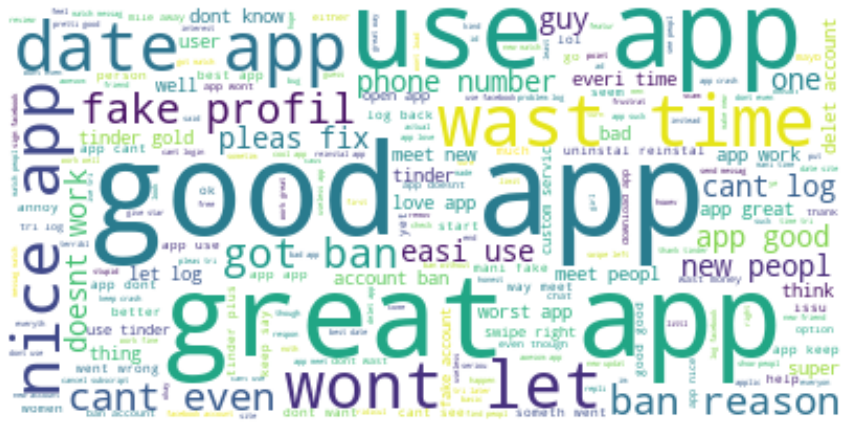

In [7]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                             content  Positive  Negative  \
0                                           nice app     0.737     0.000   
1                                               real     0.000     0.000   
2  didnt allow proper verifi ban without cite spe...     0.000     0.429   
3                                    nice beauti app     0.583     0.000   
4                               im block year reason     0.000     0.492   

   Neutral  
0    0.263  
1    1.000  
2    0.571  
3    0.417  
4    0.508  


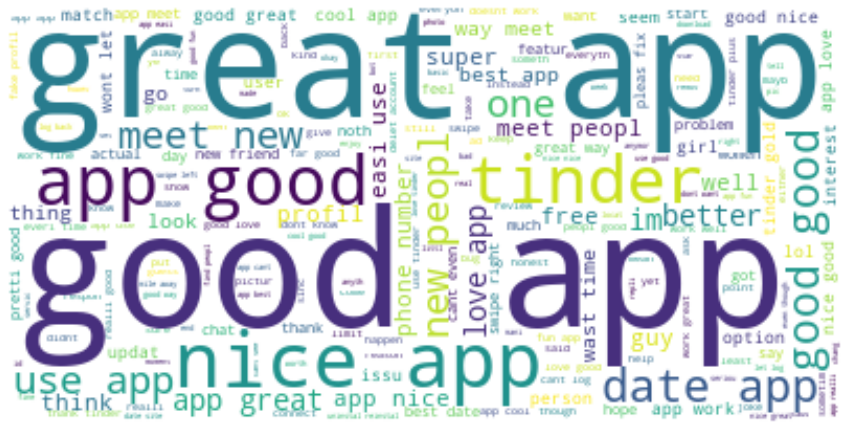

In [9]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

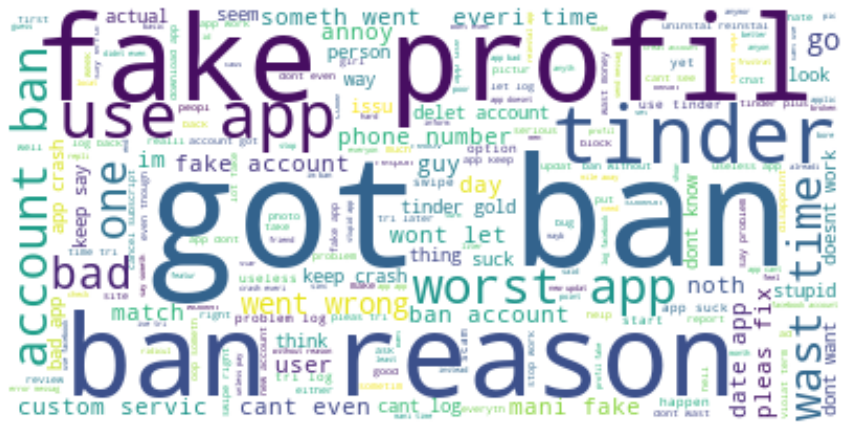

In [10]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [11]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [13]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  159844.71700002678
Negative:  60675.69799999935
Neutral:  318343.51499996893
